In [49]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [50]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str, 'ano': str, 'mes': str})
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [51]:
class0 = df[df.target==0].sample(10291*2)
class1 = df[df.target==1].sample(10291)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))
df2[df2.target==2] = 1

In [52]:
dd = df2[['weekday', 'uf', 'km_int', 'accident_type', 'accident_cause_simplified', 'br_str',
          'climate', 'ano', 'mes', 'dia', 'hora', 'target']]
dd = dd.dropna()

In [53]:
dd.target.value_counts()

1    20582
0    20582
Name: target, dtype: int64

In [54]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [57]:
y_pred = model.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.7865905502247055

Confusion matrix, without normalization
[[3735  410]
 [1347 2741]]


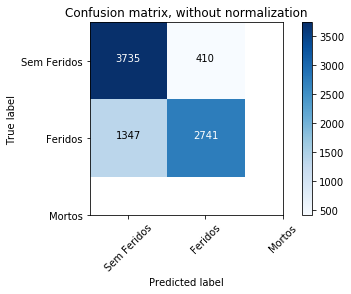

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [60]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.90      0.81      4145
          1       0.87      0.67      0.76      4088

avg / total       0.80      0.79      0.78      8233

